# 데이터 변환

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os # 파일의 경로 설정을 하기 위한 라이브러리
import tensorflow as tf
import PIL # 이미지 파일을 열기위한 라이브러리
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img # tensorflow에 맞는 형태로 이미지를 열기 위한 라이브러리
from sklearn.model_selection import train_test_split # 학습데이터를 만들기 위한 라이브러리
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D # 모델을 만들기위한 tensorflow layers,

In [5]:
path = "/content/drive/MyDrive/01_AI 프로젝트/02_머신러닝1/웜쿨 프로젝트" # 경로 변경!!

warm_list = os.listdir(path + '/warm tone') # 경로 변경!!
cool_list = os.listdir(path + '/cool tone') # 경로 변경!!

warm_path = []
warm_label = []
for i in range(len(warm_list)):
  warm_path.append("/warm tone" + f"/{warm_list[i]}") # 경로 변경!!
  warm_label.append("warm")

cool_path = []
cool_label = []
for i in range(len(cool_list)):
  cool_path.append("/cool tone" + f"/{cool_list[i]}") # 경로 변경!!
  cool_label.append("cool")

file_path_list = warm_path + cool_path
file_list = warm_list + cool_list
file_label_list = warm_label + cool_label

print(file_path_list)
print(file_list)
print(file_label_list)
print(len(file_list))

['/warm tone/KakaoTalk_20230513_014615264.jpg', '/warm tone/KakaoTalk_20230513_014615264_02.jpg', '/warm tone/KakaoTalk_20230513_014615264_03.jpg', '/warm tone/KakaoTalk_20230513_014615264_05.jpg', '/warm tone/KakaoTalk_20230513_014615264_01.jpg', '/warm tone/KakaoTalk_20230513_014615264_04.jpg', '/warm tone/KakaoTalk_20230513_014615264_24.jpg', '/warm tone/KakaoTalk_20230513_014615264_13.jpg', '/warm tone/KakaoTalk_20230513_014615264_25.jpg', '/warm tone/KakaoTalk_20230513_014615264_14.jpg', '/warm tone/KakaoTalk_20230513_014615264_18.jpg', '/warm tone/KakaoTalk_20230513_014615264_11.jpg', '/warm tone/KakaoTalk_20230513_014615264_09.jpg', '/warm tone/KakaoTalk_20230513_014615264_16.jpg', '/warm tone/KakaoTalk_20230513_014615264_26.jpg', '/warm tone/KakaoTalk_20230513_014615264_15.jpg', '/warm tone/KakaoTalk_20230513_014615264_19.jpg', '/warm tone/KakaoTalk_20230513_014615264_20.jpg', '/warm tone/KakaoTalk_20230513_014615264_17.jpg', '/warm tone/KakaoTalk_20230513_014615264_07.jpg', '/

In [6]:
df = pd.DataFrame(file_path_list, columns=['Path'])
df['FileName'] = file_list
df['Label'] = file_label_list

df.to_csv("WarmCool.csv", index=False)

In [8]:
# import shutil

# shutil.move('./WarmCool.csv', '/content/drive/MyDrive/Colab Notebooks/머신러닝1/웜쿨 프로젝트/WarmCool.csv') # 경로 변경!!

In [10]:
WarmCool = pd.read_csv(path+'/WarmCool.csv') # 경로 변경!!
WarmCool

,Path,FileName,Label
0,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014615264_19.jpg,warm
1,/warm tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230513_014615264_19.jpg,warm
2,/warm tone_argumentation/rotated_KakaoTalk_202...,rotated_KakaoTalk_20230513_014615264_19.jpg,warm
3,/warm tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230513_014615264_19.jpg,warm
4,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014615264_16.jpg,warm
...,...,...,...
231,/cool tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230513_014746732_03.jpg,cool
232,/cool tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014746732_02.jpg,cool
233,/cool tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230513_014746732_02.jpg,cool
234,/cool tone_argumentation/rotated_KakaoTalk_202...,rotated_KakaoTalk_20230513_014746732_02.jpg,cool


In [11]:
mapping = {'warm': 0, 'cool': 1}
WarmCool.Label = WarmCool.Label.map(mapping) # 웜톤: 0, 쿨톤: 1
WarmCool

,Path,FileName,Label
0,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014615264_19.jpg,0
1,/warm tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230513_014615264_19.jpg,0
2,/warm tone_argumentation/rotated_KakaoTalk_202...,rotated_KakaoTalk_20230513_014615264_19.jpg,0
3,/warm tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230513_014615264_19.jpg,0
4,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014615264_16.jpg,0
...,...,...,...
231,/cool tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230513_014746732_03.jpg,1
232,/cool tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014746732_02.jpg,1
233,/cool tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230513_014746732_02.jpg,1
234,/cool tone_argumentation/rotated_KakaoTalk_202...,rotated_KakaoTalk_20230513_014746732_02.jpg,1


train data, test data 나누기

In [ ]:
random_index = np.random.permutation(WarmCool.index) #랜덤하게 인덱스 생성

WarmCool = WarmCool.iloc[random_index] #랜덤하게 생성한 인덱스 순서로 재배열

WarmCool = WarmCool.reset_index(drop=True) #다시 순서대로 인덱스 부여
WarmCool

,Path,FileName,Label
0,/warm tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230514_125340131_12.jpg,0
1,/warm tone_argumentation/rotated_KakaoTalk_202...,rotated_KakaoTalk_20230513_014615264_10.jpg,0
2,/cool tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230513_014746732_29.jpg,1
3,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014646018_12.jpg,0
4,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014646018_06.jpg,0
...,...,...,...
231,/warm tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230514_125340131_01.jpg,0
232,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014646018_08.jpg,0
233,/cool tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230513_014933877_15.jpg,1
234,/cool tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014746732_28.jpg,1


In [ ]:
train_dataset, test_dataset = train_test_split(WarmCool, test_size=0.2, shuffle=False, random_state=42)
train_dataset = train_dataset.reset_index(drop=True)
train_dataset

,Path,FileName,Label
0,/warm tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230514_125340131_12.jpg,0
1,/warm tone_argumentation/rotated_KakaoTalk_202...,rotated_KakaoTalk_20230513_014615264_10.jpg,0
2,/cool tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230513_014746732_29.jpg,1
3,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014646018_12.jpg,0
4,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014646018_06.jpg,0
...,...,...,...
183,/warm tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230514_125340131_19.jpg,0
184,/warm tone_argumentation/rotated_KakaoTalk_202...,rotated_KakaoTalk_20230514_125340131_04.jpg,0
185,/cool tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230513_014933877_11.jpg,1
186,/warm tone_argumentation/rotated_KakaoTalk_202...,rotated_KakaoTalk_20230514_125340131_19.jpg,0


In [ ]:
test_dataset = test_dataset.reset_index(drop=True)
test_dataset

,Path,FileName,Label
0,/cool tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230513_014746732_07.jpg,1
1,/warm tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230513_014615264_08.jpg,0
2,/cool tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230514_125219089_05.jpg,1
3,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014615264_16.jpg,0
4,/cool tone_argumentation/blurred_KakaoTalk_202...,blurred_KakaoTalk_20230513_014746732_28.jpg,1
5,/warm tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230514_125340131_19.jpg,0
6,/warm tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230513_014646018_10.jpg,0
7,/warm tone_argumentation/raw_KakaoTalk_2023051...,raw_KakaoTalk_20230513_014646018_10.jpg,0
8,/warm tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230514_125340131_05.jpg,0
9,/cool tone_argumentation/flipped_KakaoTalk_202...,flipped_KakaoTalk_20230513_014746732_02.jpg,1


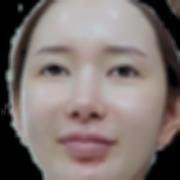

In [ ]:
img = load_img(path + f"{train_dataset.Path[0]}")
img

데이터 정규화 (0~1)

In [ ]:
def readImg(file_path, size):
  img = load_img(path + f"{file_path}", target_size=size) # tensorflow에서 제공하는 함수 이미지를 불러오고 target_size에 맞는 크기로 변형시켜준다
  img = img_to_array(img) / 255  # 가져온 이미지를 numpy araay 형태로 바꿔줌 픽셀 값은 0~255 값을 가지므로 255로 나눠져서 정규화를 시켜준다
  return img

In [ ]:
train_img = []
for i in range(len(train_dataset)):
  img = readImg(train_dataset.Path[i], (255, 255))
  train_img.append(img)

  test_img = []
for i in range(len(test_dataset)):
  img = readImg(test_dataset.Path[i], (255, 255))
  test_img.append(img)


# CNN

In [ ]:
#1
model = tf.keras.models.Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 253, 253, 32)      896       
                                                                 
 batch_normalization_24 (Bat  (None, 253, 253, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 251, 251, 32)      9248      
                                                                 
 batch_normalization_25 (Bat  (None, 251, 251, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 125, 125, 32)     0         
 g2D)                                                            
                                                      

In [ ]:
history = model.fit(np.array(train_img), np.array(train_dataset.Label), epochs=20, batch_size=5)

Epoch 1/20
38/38 [==============================] - 10s 37ms/step - loss: 5.2531 - accuracy: 0.5904
Epoch 2/20
38/38 [==============================] - 1s 36ms/step - loss: 0.6535 - accuracy: 0.6436
Epoch 3/20
38/38 [==============================] - 1s 35ms/step - loss: 0.5268 - accuracy: 0.7660
Epoch 4/20
38/38 [==============================] - 1s 36ms/step - loss: 0.3548 - accuracy: 0.7979
Epoch 5/20
38/38 [==============================] - 1s 35ms/step - loss: 0.2427 - accuracy: 0.8564
Epoch 6/20
38/38 [==============================] - 2s 40ms/step - loss: 0.1624 - accuracy: 0.9096
Epoch 7/20
38/38 [==============================] - 2s 42ms/step - loss: 0.1271 - accuracy: 0.9468
Epoch 8/20
38/38 [==============================] - 2s 42ms/step - loss: 0.1180 - accuracy: 0.9096
Epoch 9/20
38/38 [==============================] - 2s 40ms/step - loss: 0.1954 - accuracy: 0.9149
Epoch 10/20
38/38 [==============================] - 1s 37ms/step - loss: 0.3954 - accuracy: 0.8777
Epoch 11

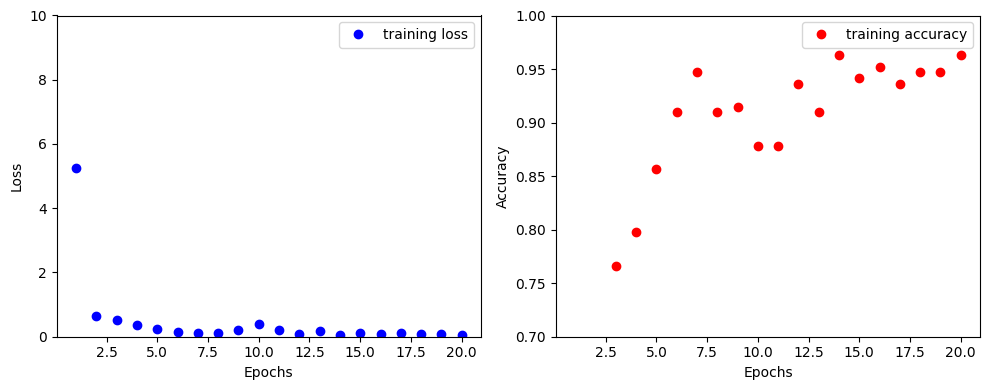

In [ ]:
import matplotlib.pyplot as plt

history_dict= history.history

loss = history_dict['loss']
accuracy = history_dict['accuracy']
epochs = range(1, len(loss)+1)
plt.figure(figsize=(10, 4))

plt.subplot(121)

plt.plot(epochs, loss, 'bo',label='training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 10)
plt.legend()

plt.subplot(122)

plt.plot(epochs, accuracy, 'ro',label='training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
label_predict = model.predict(np.array(test_img)).astype(int)
label_predict

2/2 [==============================] - 0s 28ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(np.array(test_dataset.Label), label_predict)
accuracy

0.5833333333333334

[Accuracy] : 0.5833333333333334

[Classification_report] 
               precision    recall  f1-score   support

           0       1.00      0.58      0.74        48
           1       0.00      0.00      0.00         0

    accuracy                           0.58        48
   macro avg       0.50      0.29      0.37        48
weighted avg       1.00      0.58      0.74        48


[Confusion_matrix]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


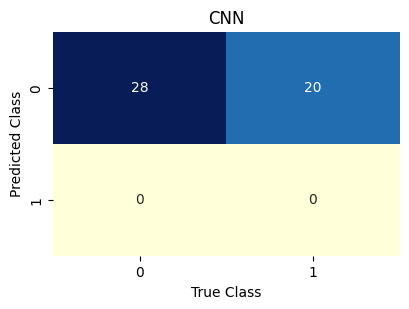

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("[Accuracy] :", accuracy_score(label_predict,test_dataset.Label))
print("\n[Classification_report] \n", classification_report(label_predict,test_dataset.Label))
print("\n[Confusion_matrix]")
cf_matrix = confusion_matrix(label_predict,test_dataset.Label)
class_names = ('0', '1')
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)
plt.figure(figsize=(4, 3))
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
plt.title("CNN"), plt.tight_layout()
plt.xlabel("True Class"),
plt.ylabel("Predicted Class")
plt.show()